# Setups

In [1]:
# import modules 
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt

In [10]:
# path setup
datadir = '../../bubble_sizes/Rbubble_lists/bubble_sim_final/'    # Path to the directory containing the bubble lists
dir_bg_z8_muv=datadir+'bg_muv_z8/'  # dir for galaxy bubble list [Muv-Rbub] of rapid reionization model (bg), z=8, xHI=0.1-0.9
dir_fg_z8_muv=datadir+'fg_muv_z8/'  # dir for galaxy bubble list [Muv-Rbub] of gradual reionization model (fg), z=8, xHI=0.1-0.9
dir_bg_z8_od=datadir+'bg_od_z8/' # dir for overdensity bubble list [overdensity-Rbub]
dir_fg_z8_od=datadir+'fg_od_z8/'
dir_bg_z8_rall=datadir+'bg_rall_z8/' # dir for full box bubble list [Rbub]
dir_fg_z8_rall=datadir+'fg_rall_z8/'
os.listdir(dir_bg_z8_muv) # try to list the files in the directory

['xH_nohalos_z008.00_nf0.199022_eff2720.3_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_1024_1600Mpc_muv_r_short',
 'xH_nohalos_z008.00_nf0.499813_eff1638.5_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_1024_1600Mpc_muv_r_short',
 'xH_nohalos_z008.00_nf0.695461_eff1092.6_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_1024_1600Mpc_muv_r_short',
 'xH_nohalos_z008.00_nf0.399706_eff1936.8_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_1024_1600Mpc_muv_r_short',
 'xH_nohalos_z008.00_nf0.097615_eff3444.2_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_1024_1600Mpc_muv_r_short',
 'xH_nohalos_z008.00_nf0.299324_eff2279.2_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_1024_1600Mpc_muv_r_short',
 'xH_nohalos_z008.00_nf0.591873_eff1381.7_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_1024_1600Mpc_muv_r_short',
 'xH_nohalos_z008.00_nf0.796971_eff790.3_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_1024_1600Mpc_muv_r_short',
 'xH_nohalos_z008.00_nf0.898362_eff441.5_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_102

# Demo

## check xHI of bubble lists in a folder

In [3]:
dirin=dir_bg_z8_muv # choose the directory to read
for i,fil in enumerate(np.sort(os.listdir(dirin))): # loop over the files in the directory
    ind=fil.find('nf') # find the index of the string 'nf'
    xHI=float(fil[ind+2:ind+6]) # extract the xHI value from the file name
    print(xHI)

0.09
0.19
0.29
0.39
0.49
0.59
0.69
0.79
0.89


## read bubble lists 

In [8]:
# parameter setup
models=['bg','fg']
zs=[8]

### read and plot galaxy Muv-Rbub bubble list

In [11]:
muvbublist={} # dictionary to store the bubble lists
for mod in models: # loop over reionization models
    muvbublist[mod]={} 
    for z in zs: # loop over redshifts
        muvbublist[mod][str(z)]={} 
        boxdir=vars()['dir_'+mod+'_z'+str(z)+'_muv']
        boxfils=np.sort(os.listdir(boxdir))

        for i,fil in enumerate(boxfils):
            ind=fil.find('nf')
            xHI=np.round(float(fil[ind+2:ind+6]),1)
            #print('reading model '+mod+', z='+str(z)+', xHI='+str(xHI))
            data=pd.read_csv(boxdir+fil)
            muvbublist[mod][str(z)][str(xHI)]=pd.DataFrame(data=np.vstack((data['Muv'],data['R_cMpc'])).T, columns=['Muv','R_cMpc'])

#### Plot bubble size distribution for xHI=0.5, Muv=-18 galaxies 

Text(0, 0.5, 'Bubble size distribution, $\\mathrm{dP/dlogR}$')

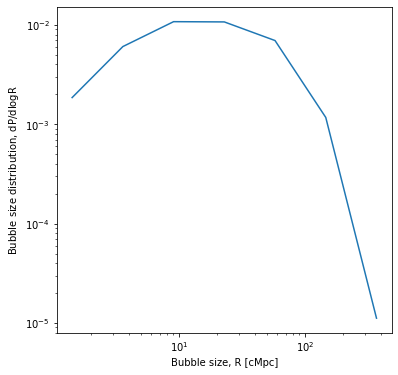

In [12]:
z=8
xHI=0.5
mod='fg' # gradual reionization model

df=muvbublist[mod][str(z)][str(xHI)]
Muvs=df.Muv 
Rbubs=df.R_cMpc
bins=np.logspace(np.log10(0.8),np.log10(1.1*np.max(Rbubs)),8) # define the bins for the histogram

Rbub18=Rbubs[(Muvs>-18.1)&(Muvs<-17.9)] # select the bubble list for Muv=-18



PRhist, Rhistedge =np.histogram(Rbub18,density=True,bins=bins)  # calculate the histogram
Rhist=0.5*(Rhistedge[:-1] + Rhistedge[1:]) # calculate the bin centers
yy=PRhist*Rhist # calculate the y values for the dP/dlogR plot

PlogR_norm=yy/np.trapz(yy,x=Rhist) # normalize the distribution

# plot the distribution
plt.figure(figsize=(6,6))
plt.plot(Rhist,PlogR_norm)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Bubble size, R [cMpc]')
plt.ylabel(r'Bubble size distribution, $\mathrm{dP/dlogR}$')


## read overdensity bubble list

In [14]:
odbublist={} # dictionary to store the bubble lists
for mod in models: # loop over reionization models
    odbublist[mod]={} 
    for z in zs: # loop over redshifts
        odbublist[mod][str(z)]={} 
        boxdir=vars()['dir_'+mod+'_z'+str(z)+'_od']
        boxfils=np.sort(os.listdir(boxdir))

        for i,fil in enumerate(boxfils):
            ind=fil.find('nf')
            xHI=np.round(float(fil[ind+2:ind+6]),1)
            #print('reading model '+mod+', z='+str(z)+', xHI='+str(xHI))
            data=pd.read_csv(boxdir+fil)
            odbublist[mod][str(z)][str(xHI)]=pd.DataFrame(data=np.vstack((data['Overdensity'],data['R_cMpc'])).T, columns=['Overdensity','R_cMpc'])

### plot overdensity distribution

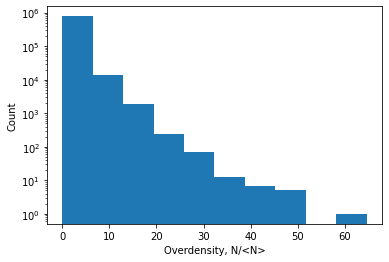

In [15]:
df=odbublist['fg']['8']['0.5']
plt.hist(df.Overdensity)
plt.xlabel('Overdensity, N/<N>')
plt.ylabel('Count')
plt.yscale('log')

## read full box bubble list 

In [17]:
fullbublist={} # dictionary to store the bubble lists
for mod in models: # loop over reionization models
    fullbublist[mod]={} 
    for z in zs: # loop over redshifts
        fullbublist[mod][str(z)]={} 
        boxdir=vars()['dir_'+mod+'_z'+str(z)+'_rall']
        boxfils=np.sort(os.listdir(boxdir))

        for i,fil in enumerate(boxfils):
            ind=fil.find('nf')
            xHI=np.round(float(fil[ind+2:ind+6]),1)
            #print('reading model '+mod+', z='+str(z)+', xHI='+str(xHI))
            data=pd.read_csv(boxdir+fil)
            fullbublist[mod][str(z)][str(xHI)]=pd.DataFrame(data=(data['R_cMpc']), columns=['R_cMpc'])

### plot the bubble size distribution for the full box at xHI=0.5

Text(0, 0.5, 'Bubble size distribution, $\\mathrm{dP/dlogR}$')

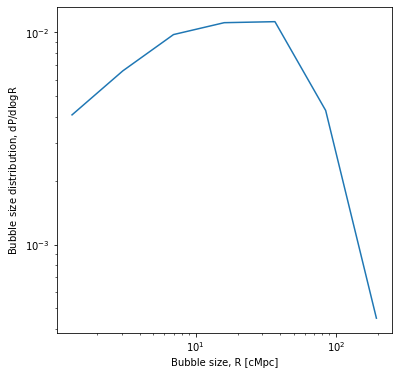

In [48]:
z=8
xHI=0.5
mod='fg' # gradual reionization model

df=fullbublist[mod][str(z)][str(xHI)]
Rbubs=df.R_cMpc
bins=np.logspace(np.log10(0.8),np.log10(1.1*np.max(Rbubs)),8) # define the bins for the histogram


PRhist, Rhistedge =np.histogram(Rbubs,density=True,bins=bins)  # calculate the histogram
Rhist=0.5*(Rhistedge[:-1] + Rhistedge[1:]) # calculate the bin centers
yy=PRhist*Rhist # calculate the y values for the dP/dlogR plot

PlogR_norm=yy/np.trapz(yy,x=Rhist) # normalize the distribution

# plot the distribution
plt.figure(figsize=(6,6))
plt.plot(Rhist,PlogR_norm)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Bubble size, R [cMpc]')
plt.ylabel(r'Bubble size distribution, $\mathrm{dP/dlogR}$')

#### plot R_b(xHI)

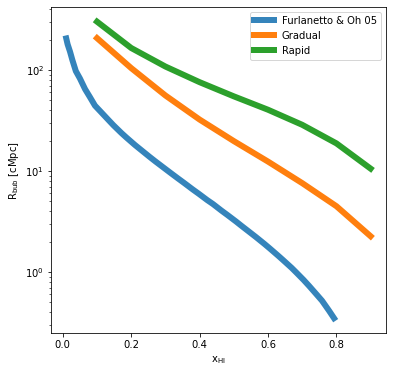

In [24]:
z=8
xHI_all=np.arange(0.1,1.0,0.1)


R_xHI=np.zeros((len(xHI_all),2))
for xHIi,xHI in enumerate(xHI_all):
    for modi,mod in enumerate(['fg','bg']):
        xHI=str(xHI)
        df=fullbublist[mod][str(z)][str(xHI)[:3]]
        Rbubs=df.R_cMpc
        R_xHI[xHIi,modi]=np.mean(Rbubs[Rbubs>0])

plt.figure(figsize=(6,6))

y=[0.348, 0.410, 0.518, 0.598, 0.727, 0.833, 0.984, 1.097, 1.310, 1.444, 1.710, 1.900, 2.224, 2.451, 2.851, 3.148, 3.671, 4.047, 4.706, 5.155, 5.930, 6.559, 7.642, 8.422, 9.688, 10.713, 12.494, 13.866, 16.241, 18.087, 21.432, 23.832, 28.384, 32.122, 39.225, 44.402, 54.103, 64.780, 82.563, 97.707, 125.437, 152.324, 179.883, 205.681]
x=np.asarray([0.207,0.221,0.242,0.258,0.280,0.296,0.317,0.331,0.356,0.370,0.395,0.411,0.436,0.452,0.477,0.493,0.519,0.536,0.561,0.578,0.602,0.620,0.646,0.663,0.687,0.704,0.730,0.747,0.772,0.789,0.814,0.829,0.852,0.867,0.891,0.906,0.921,0.935,0.950,0.962,0.972,0.979,0.986,0.990])
plt.plot(1-x,y,label='Furlanetto & Oh 05',linewidth=6,alpha=0.9)

plt.plot(xHI_all,R_xHI[:,0],linewidth=6,label='Gradual')
plt.plot(xHI_all,R_xHI[:,1],linewidth=6,label='Rapid')
plt.legend()
plt.xlabel(r'$\mathrm{x_{HI}}$')
plt.ylabel(r'$\mathrm{R_{bub}}$ [cMpc]')
plt.yscale('log')
